In [149]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [150]:
df = pd.read_excel("teste_for2.xlsx")

In [151]:
df.head(50)

,ds,y
0,2021-01-01,540000.000000
1,2021-02-01,578487.000000
2,2021-03-01,536017.643000
3,2021-04-01,482047.448927
4,2021-05-01,437923.926989
5,2021-06-01,387359.763792
6,2021-07-01,431974.806390
7,2021-08-01,456086.083520
8,2021-09-01,446399.136601
9,2021-10-01,393067.746099


In [152]:
len(df)

36

In [153]:
36*0.7

25.2

In [154]:
train = df.iloc[0:25]
test = df.iloc[25:]

In [155]:
train.head(50)

,ds,y
0,2021-01-01,540000.000000
1,2021-02-01,578487.000000
2,2021-03-01,536017.643000
3,2021-04-01,482047.448927
4,2021-05-01,437923.926989
5,2021-06-01,387359.763792
6,2021-07-01,431974.806390
7,2021-08-01,456086.083520
8,2021-09-01,446399.136601
9,2021-10-01,393067.746099


In [156]:
test.head(50)

,ds,y
25,2023-02-01,448504.922824
26,2023-03-01,409210.368673
27,2023-04-01,395002.054617
28,2023-05-01,363677.032016
29,2023-06-01,325730.584664
30,2023-07-01,319073.548233
31,2023-08-01,271133.739202
32,2023-09-01,231439.268071
33,2023-10-01,267740.436122
34,2023-11-01,233527.291325


# Prophet

In [157]:
#!pip install prophet

In [158]:
from prophet import Prophet
from prophet.plot import plot_plotly

In [159]:
my_model = Prophet(interval_width=0.95)

In [160]:
my_model.fit(train)

22:59:23 - cmdstanpy - INFO - Chain [1] start processing
22:59:51 - cmdstanpy - INFO - Chain [1] done processing


In [161]:
future_dates = my_model.make_future_dataframe(periods=36, freq='MS')
future_dates.head()

,ds
0,2021-01-01
1,2021-02-01
2,2021-03-01
3,2021-04-01
4,2021-05-01


In [162]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2021-01-01,540000.032441,540000.032434,540000.032448
1,2021-02-01,578486.771933,578486.771926,578486.771940
2,2021-03-01,536016.992748,536016.992740,536016.992754
3,2021-04-01,482047.845691,482047.845685,482047.845698
4,2021-05-01,437923.826427,437923.826420,437923.826434


In [163]:
forecast.head(50)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-01,541666.302450,540000.032434,540000.032448,541666.302450,541666.302450,-1666.270009,-1666.270009,-1666.270009,-1666.270009,-1666.270009,-1666.270009,0.0,0.0,0.0,540000.032441
1,2021-02-01,529695.616280,578486.771926,578486.771940,529695.616280,529695.616280,48791.155653,48791.155653,48791.155653,48791.155653,48791.155653,48791.155653,0.0,0.0,0.0,578486.771933
2,2021-03-01,518741.250686,536016.992740,536016.992754,518741.250686,518741.250686,17275.742062,17275.742062,17275.742062,17275.742062,17275.742062,17275.742062,0.0,0.0,0.0,536016.992748
3,2021-04-01,506346.648458,482047.845685,482047.845698,506346.648458,506346.648458,-24298.802767,-24298.802767,-24298.802767,-24298.802767,-24298.802767,-24298.802767,0.0,0.0,0.0,482047.845691
4,2021-05-01,485345.471401,437923.826420,437923.826434,485345.471401,485345.471401,-47421.644974,-47421.644974,-47421.644974,-47421.644974,-47421.644974,-47421.644974,0.0,0.0,0.0,437923.826427
5,2021-06-01,463506.600656,387359.543934,387359.543947,463506.600656,463506.600656,-76147.056716,-76147.056716,-76147.056716,-76147.056716,-76147.056716,-76147.056716,0.0,0.0,0.0,387359.543940
6,2021-07-01,442312.712542,431974.515838,431974.515853,442312.712542,442312.712542,-10338.196697,-10338.196697,-10338.196697,-10338.196697,-10338.196697,-10338.196697,0.0,0.0,0.0,431974.515846
7,2021-08-01,420409.894019,456086.108739,456086.108753,420409.894019,420409.894019,35676.214726,35676.214726,35676.214726,35676.214726,35676.214726,35676.214726,0.0,0.0,0.0,456086.108746
8,2021-09-01,399037.924647,446399.169815,446399.169829,399037.924647,399037.924647,47361.245175,47361.245175,47361.245175,47361.245175,47361.245175,47361.245175,0.0,0.0,0.0,446399.169822
9,2021-10-01,378746.470476,393067.503808,393067.503821,378746.470476,378746.470476,14321.033339,14321.033339,14321.033339,14321.033339,14321.033339,14321.033339,0.0,0.0,0.0,393067.503815


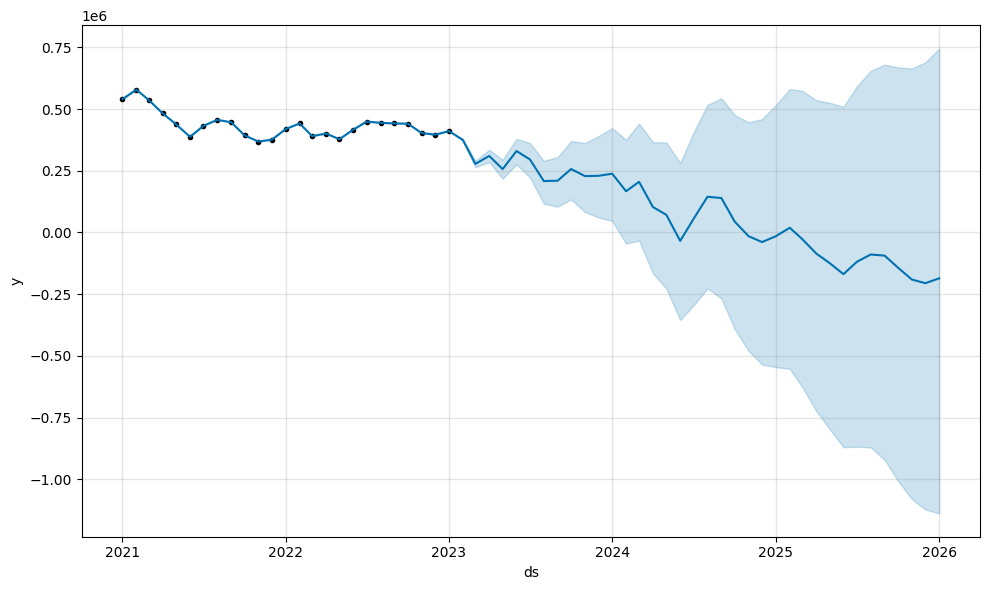

In [176]:
my_model.plot(forecast, uncertainty=True)
plt.show()

# ARIMA - Window

In [164]:
from sktime.forecasting.arima import ARIMA

In [177]:
forecaster = ARIMA(  
    order=(2, 1, 1),
    suppress_warnings=True)

In [178]:
forecaster.fit(train['y']) 

ARIMA(order=(2, 1, 1), suppress_warnings=True)

In [179]:
y_pred = forecaster.predict(fh=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])

In [180]:
y_pred

25    404747.362547
26    393943.952342
27    383577.509721
28    374219.227667
29    365337.999370
30    356558.529106
31    347760.230122
32    338936.016392
33    330100.715227
34    321263.433283
35    312426.796525
36    303590.814765
37    294755.087051
38    285919.395252
39    277083.683555
40    268247.955550
41    259412.221814
42    250576.487505
43    241740.753772
44    232905.020440
45    224069.287235
46    215233.554036
47    206397.820822
48    197562.087597
Name: y, dtype: float64

# Finais

In [173]:
y_pred.to_excel("arima.xlsx")

In [174]:
forecast.to_excel("propeh.xlsx")